In [21]:
import sqlite3
import matplotlib.pyplot as plt
from statistics import geometric_mean, harmonic_mean, mean, median, stdev

def load_dataset(path, lang):
    con = sqlite3.connect(path)
    con.row_factory = sqlite3.Row
    cur = con.cursor()
    data = []
    cur.execute('SELECT t.id, COUNT(*) as token_length FROM teks_token tt, teks t  WHERE t.id = tt.teks_id AND t.lang = ? GROUP BY t.id', [lang])
    for row in cur.fetchall():
        data.append(row['token_length'])
    con.close()
    return data

In [22]:
MAD_BASE = sorted(load_dataset('./dataset_db.db', 'MAD'))
IND_BASE = sorted(load_dataset('./dataset_db.db', 'IND'))
MAD_WP8K = sorted(load_dataset('./dataset_wordpiece_db.db', 'MAD'))
IND_WP8K = sorted(load_dataset('./dataset_wordpiece_db.db', 'IND'))
data_keys_base = {'MAD_BASE': MAD_BASE, 'IND_BASE': IND_BASE}
data_keys_wp8k = {'MAD_WP8K': MAD_WP8K, 'IND_WP8K': IND_WP8K}
data_keys = {**data_keys_base, **data_keys_wp8k}

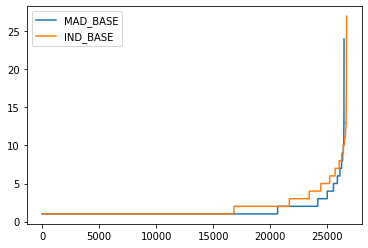

In [23]:
fig = plt.figure()
ax = plt.axes()

for data in data_keys_base:
    ax.plot(data_keys_base[data], label=data)
ax.legend()

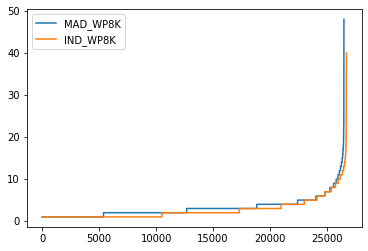

In [24]:
fig = plt.figure()
ax = plt.axes()

for data in data_keys_wp8k:
    ax.plot(data_keys_wp8k[data], label=data)
ax.legend()

In [25]:
# get all median, mean, stdev, etc
for data in data_keys:
    print(data)
    print('Median: ', median(data_keys[data]))
    print('Mean: ', mean(data_keys[data]))
    print('Stdev: ', stdev(data_keys[data]))
    print('Geometric Mean: ', geometric_mean(data_keys[data]))
    print('Harmonic Mean: ', harmonic_mean(data_keys[data]))
    print('')

MAD_BASE
Median:  1
Mean:  1.4537726225110514
Stdev:  1.212703091140087
Geometric Mean:  1.2463755997278636
Harmonic Mean:  1.152531120765049

IND_BASE
Median:  1
Mean:  1.9283171581668976
Stdev:  1.8358789651669059
Geometric Mean:  1.5078099827296265
Harmonic Mean:  1.3063170870543168

MAD_WP8K
Median:  3
Mean:  3.101560433747686
Stdev:  2.355737183623737
Geometric Mean:  2.525711122459933
Harmonic Mean:  2.0987539720624926

IND_WP8K
Median:  2
Mean:  2.6613707048375614
Stdev:  2.450077177979614
Geometric Mean:  2.020695509867453
Harmonic Mean:  1.6494786699091197

